## Introduction About the Data :
#### The goal is to predict medical expenses of any indiviual  (Regression Analysis).


### Problem statement:
The goal of this project is to give people an estimate of how much they need based on
their individual health situation. After that, customers can work with any health
insurance carrier and its plans and perks while keeping the projected cost from our
study in mind. This can assist a person in concentrating on the health side of an
insurance policy rather han the ineffective part.

### There are 7 independent variables:

- age: gives the age of an individual
- sex: gender details of an individual 
- bmi: gives body mass index of an individual
- children: No. of children an individual has
- smoker: states if an individual is smoker or not
- region: which part of india an individual lives in

### Target Variable:

- expenses: Future Medical expenses for an individual

### Dataset:
#### Dataset Source Link :https://www.kaggle.com/noordeen/insurance-premium-prediction
#### The data consists of 7 column and 1338 rows.

### Project's trejectory:
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1. Read the dataset

In [4]:
import pandas as pd
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Data Checks to perform
- Check data Types
- Check Missing Values
- Check Duplicates
- Check the number of unique values of each column

### Check Dataset Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Check Missing Values in Dataset

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### Check Duplicates in Dataset

In [7]:
df.duplicated().sum()

1

In [9]:
df[df. duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [10]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


### Check Unique Values in each column

In [17]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

### Descriptive Statistics

#### Numerical and Categorical columns seperation

In [12]:
numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['age', 'bmi', 'children', 'expenses']
Categorical Columns : ['sex', 'smoker', 'region']


#### Numerical Columns Description

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


#### Categorical Columns Description

In [19]:
df[categorical_columns].describe().T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


### Data Analysis with Visualization

### Univariate Data Analysis

#### Univariate Analysis of Numerical Variables

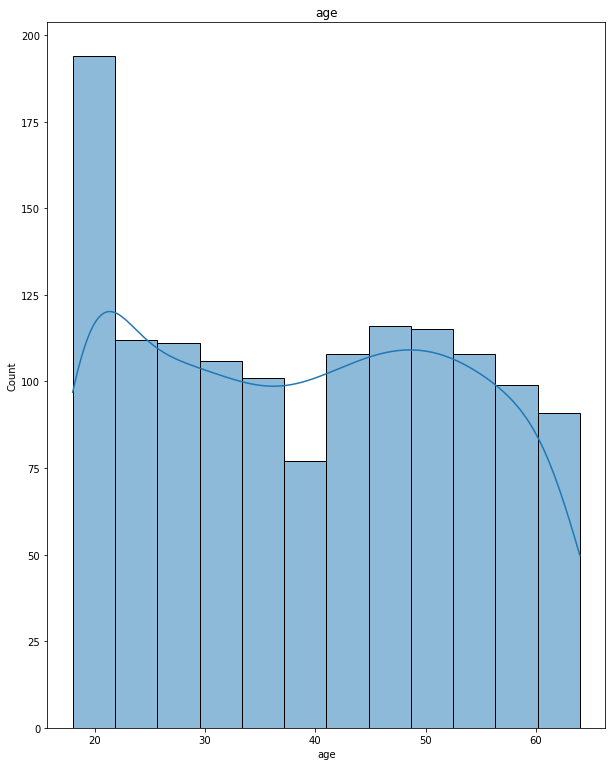

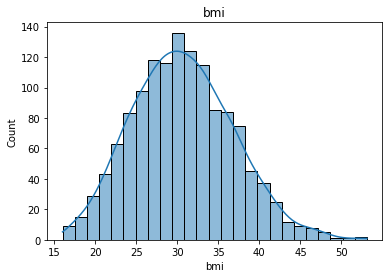

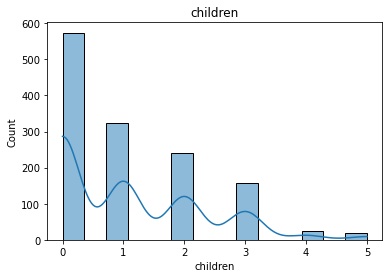

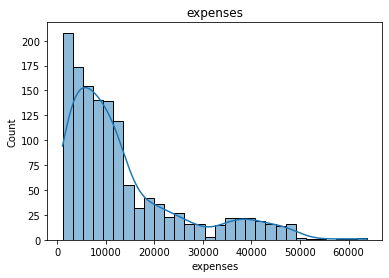

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numerical_columns:
    sns.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

#### Univariate analysis for categorical variables

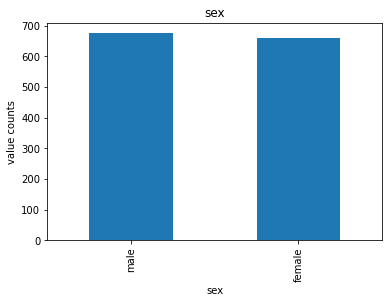

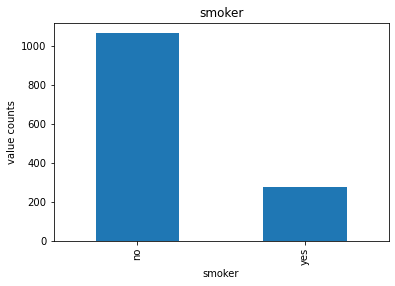

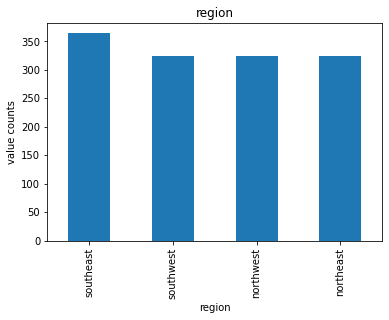

In [22]:
for i in categorical_columns:
    df[i].value_counts().plot(kind='bar', xlabel = i , ylabel='value counts', title = i)
    print('\n')
    plt.show()

### Bivariate Analysis with Visualisation

In [34]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


#### Correlation heatmap

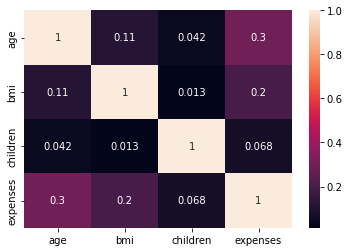

In [32]:
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Pairplot

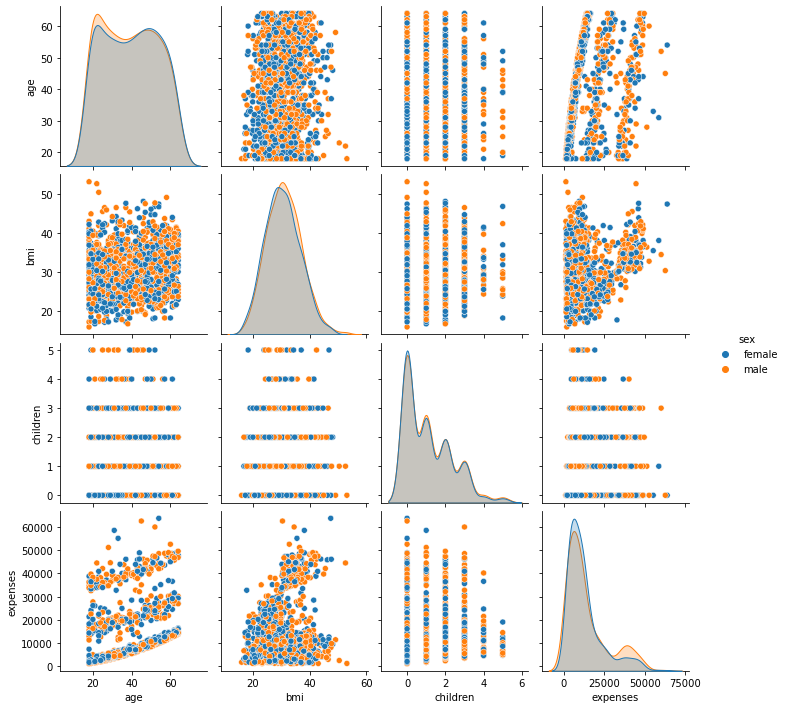

In [38]:
sns.pairplot(df,hue = 'sex')
plt.show()

#### Categorical Features vs Target Feature Expenses Boxplot

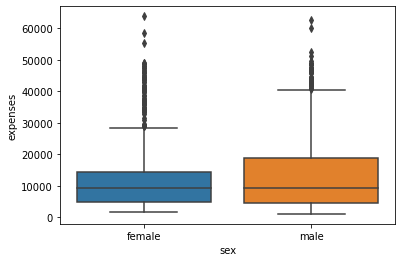

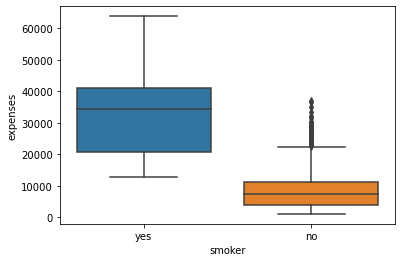

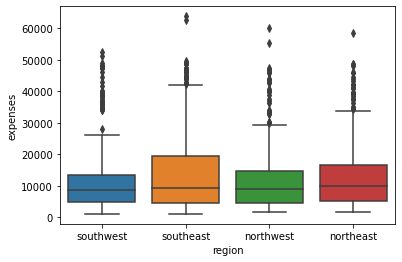

In [30]:
for i in categorical_columns:
    sb.boxplot(data=df, x=i , y='expenses')
    plt.show()

### Ordinal Mapping of categorical features

#### It is observed that the categorical variables 'sex', 'smoker' and 'region' are ordinal in nature.Creating Mapper for each categorical variable

In [39]:
sex_mapper = {"female":1, "male":2}
smoker_mapper = {"yes":1,"no":2}
region_mapper = {"southwest":1 ,"southeast":2 ,"northwest":3 , "northeast":4}

### Applying the mapper to the dataframe

In [40]:
df['sex'] = df['sex'].replace(sex_mapper)
df['smoker'] = df['smoker'].replace(smoker_mapper)
df['region'] = df['region'].replace(region_mapper)

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,1,16884.92
1,18,2,33.8,1,2,2,1725.55
2,28,2,33.0,3,2,2,4449.46
3,33,2,22.7,0,2,3,21984.47
4,32,2,28.9,0,2,3,3866.86


#### Mutual Information Scores

In [43]:
X = df.drop(labels=['expenses'],axis=1)
Y = df[['expenses']]

#### Calculating Mutual Information scores for regression

In [44]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X,Y.values.flatten(),random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [45]:
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

#### Visualizing Mutual Information Scores

age         1.498569
smoker      0.369171
sex         0.176660
children    0.161886
bmi         0.080141
region      0.076238
Name: MI Scores, dtype: float64


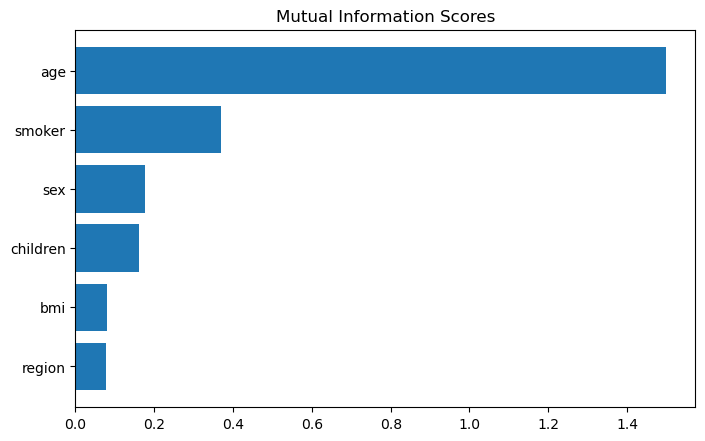

In [46]:
print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

### Conclusion : Above shows that age is the most important feature to predict the expense of an individual.